In [3]:
import polars as pl
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from jormund import *

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

%matplotlib inline

setup_plots()

In [5]:
spy = pl.read_csv('s&p500.csv')
spy = spy.with_columns([
    pl.col("Date").str.strptime(pl.Date, "%Y-%m-%d").alias("date")
])
spy = spy.drop('Date')
display(spy)
spy.describe()

Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,date
f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,date
24.626128,24.626128,24.50361,24.608625,1003200,29,4,4,1,1993,1993-01-29
24.626124,24.783648,24.626124,24.783648,480500,1,0,5,2,1993,1993-02-01
24.766156,24.853669,24.713648,24.836166,201300,2,1,5,2,1993,1993-02-02
24.871164,25.1162,24.853662,25.098698,529400,3,2,5,2,1993,1993-02-03
25.186225,25.256235,24.906184,25.203728,531500,4,3,5,2,1993,1993-02-04
…,…,…,…,…,…,…,…,…,…,…
570.47998,571.359985,567.599976,571.299988,46805700,24,1,39,9,2024,2024-09-24
571.140015,571.890015,568.909973,570.039978,38428600,25,2,39,9,2024,2024-09-25
574.380005,574.710022,569.900024,572.299988,48336000,26,3,39,9,2024,2024-09-26


statistic,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,date
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",7974.0,7974.0,7974.0,7974.0,7974.0,7974.0,7974.0,7974.0,7974.0,7974.0,"""7974"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",149.713946,150.585149,148.759162,149.726437,8.3932e7,15.733133,2.021696,26.532857,6.520191,2008.403185,"""2008-11-25 16:03:04.198000"""
"""std""",124.401746,125.046106,123.708679,124.430293,9.1361e7,8.753391,1.399649,14.891433,3.412048,9.148048,null
"""min""",24.311077,24.381094,23.978528,24.311077,5200.0,1.0,0.0,1.0,1.0,1993.0,"""1993-01-29"""
"""25%""",70.492783,71.11392,69.982523,70.609909,1.06068e7,8.0,1.0,14.0,4.0,2000.0,"""2000-12-19"""
"""50%""",93.891384,94.603544,93.095004,93.94651,6.28776e7,16.0,2.0,26.0,7.0,2008.0,"""2008-11-25"""
"""75%""",189.736057,190.162038,189.284038,189.75087,1.139124e8,23.0,3.0,39.0,9.0,2016.0,"""2016-10-26"""
"""max""",574.380005,574.710022,570.419983,573.76001,8.710263e8,31.0,4.0,53.0,12.0,2024.0,"""2024-09-30"""


In [11]:
spy_val = spy.filter(pl.col("Year").is_in([2022, 2023]))
spy_test = spy.filter(pl.col("Year") == 2024)

In [15]:
spy_train = spy.filter(pl.col("Year") < 2022)

In [13]:
spy_val.write_parquet("val.parquet")

In [14]:
spy_test.write_parquet("test.parquet")

In [16]:
spy_train.write_parquet("train.parquet")

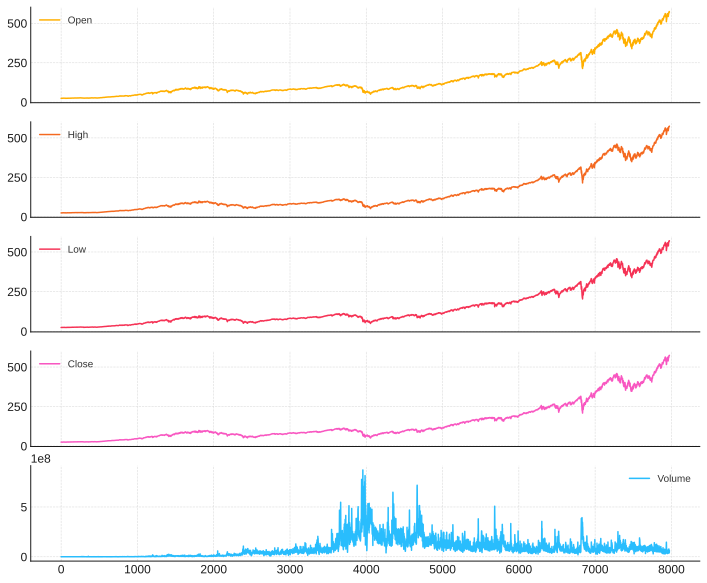

In [48]:
features = ['Open','High','Low','Close','Volume']
spy[features].to_pandas().plot(subplots=True,figsize=(12,10))
plt.show() 

In [52]:
for i in range(5):
    print(f"Day of the Week for trading ({i}):", spy.filter(pl.col("Weekday") == i)["Close"].mean())

Day of the Week for trading (0): 148.9345426667748
Day of the Week for trading (1): 149.87410792861417
Day of the Week for trading (2): 149.7265812248939
Day of the Week for trading (3): 150.05655718947614
Day of the Week for trading (4): 149.98497031239305
